In [1]:
# PROBLEM AND GOAL

In [2]:
#PROBLEM:BUILD A PREDICTIVE MODEL SO AS TO SUGGEST THE MOST SUITABLE CROPS TO GROW 
#BASED ON THE AVAILABLE CLIMATE AND SOIL CONDITIONS.

In [3]:
#GOAL: ACHIEVE PRECISION FARMING BY OPTIMIZING THE AGRICULTURAL PRODUCTION.

In [4]:
#THIS PROJECT IS INTENDED ON PRECISION FARMING.
#1.WE HAVE TO OPTIMIZE PRODUCTIVITY.
#2.BY UNDERSTANDIMG REQUIREMNENTS OF CLIMATE AND SOIL CONDITIONS FOR CROPS.
#3.HELPS US TO COPE UP WITH WEATHER UNPREDICTABILITY.

In [5]:
#INTERVIEW QUESTION....
#1.WHAT IS THE FINAL OUTCOME OF YOUR PROJECT?
#2.WHAT IS THE BUSINESS IMPACT OF YOUR PROJECT?
#3.WHAT PROBLEM YOU ARE TRYING TO SOLVE?
#4.WHO WERE YOUR END USERS ,WHO GOT POSITIVELY IMPACTED BY THIS PROJECT OUTCOME?

In [6]:
#This is Unsupervised learning problem......so we dont need the last "label" column to do your predicitve analysis.

# INSTALLING LIBRARIES

In [7]:
#installing all the libraries:
#1. install numpy: NumPy is used to perform complex mathematical operations.
#2. install pandas: Pandas is used for dataframe manupulation.
#3. install matplotlib : matplotlib is used for crateing data visulaization.
#4. install seaborn : seaborn is the library which is also used  for creating the data visulzation.
#5. install ipywidgets : this is used for interactive analysis.
#6. install sklearn : this library is used to implement the complex machine learning algorithms.

In [8]:
pip install numpy

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
#NOW ALL THE REQUIRED LIBRARIES ARE NOW GOT INSTALLED....NOW FOR USING THOSE INSTALLED LIBRARIES...WE HAVE TO IMPORT THEM..
# BECAUSE WITHOUT IMPORTING THE LIBRARIES WE CANNOT USE THEM.

# IMPORTING LIBRARIES

In [15]:
#for manipulations
import numpy as np
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns


#for interactivity
from ipywidgets import interact

In [16]:
#Lets read the dataset
data=pd.read_csv('data.csv')        #csv: comma seperated value......pd.read_csv()
                                    #json: pd.read_json()
                                    #xlm : pd.read_xlm()...........etc. pandas helps to read every kind of datasets.

In [17]:
#Lets check the shape of the dataset.
print("Shape of the Dataset: " ,data.shape)   #This means 2200 rows and 8 columns...in our dataset.

Shape of the Dataset:  (2200, 8)


In [18]:
#Lets check the head of the dataset....ie.it will show us first five entries of the dataset.
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [19]:
#Lets check the tail of the dataset....ie.it will show us last five entries of the dataset.
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [20]:
#Now lets make sure that do we have any missing value in this dataset....this is an important task to do..because no machine 
#learning model can work with missing values.

In [21]:
#QUES: HOW DO WE DETECT IF A DATASET,HAVE MISSING OR IN OTHER WORDS NULL VALUES.....

#ans: So in Python we have a function isnull(), which gonna help us to find the number of missing values in each 
#column of our dataset.

In [22]:
#Lets check if there is any missing value present in the dataset.
data.isnull()          #This False indicates that they are not missing values or not null areas....

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [23]:
#Lets count all the null values in total for each column....so sum the number of null cell in each column.
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [24]:
# This gives us an insight that there is no missing value present in this dataset,in any of the column.

In [25]:
#But in most of the cases, we gonna face so many null values ..and we have to make is filled values...
#so that we can work with ML model properly.

In [26]:
#So in those cases what we gonna do is  :  use     fillna() function
#NA means Not Available.
#Pandas have functions like fill-NA to treat missing values.
#so many replacement we have: '0','mean value','median value','mode value'...as per the condition.

#NOW THE QUESTION IS:
#QUES:HOW TO DECIDE THAT WHEN TO USE MEAN or MEDIAN or MODE...IN PLACE OF MISSING VALUES.

#1. WHENEVER YOU CAME ACROSS ANY NUMERICAL COLUMN IN YOUR DATASET, THEN IN THAT CASE...FOR REPLACING THE MISSING VALUE
#   WE WILL USE MEAN VALUES.
#        eg.     data.fillna(data.mean())    or    df.fillna(df.mean())


#2. WHENEVER YOU CAME ACROSS CATEGORICAL VALUES IN YOUR DATASET, THEN IN THAT CASE...FOR REPLACING THE MISSING VALUE
#   WE WILL USE MODE VALUES.
#        eg.     data.fillna(data.mode())    or    df.fillna(df.mode())


#3. WHENEVER YOU CAME ACROSS SO MANY OUTLIERS IN YOUR DATASET, THEN IN THAT CASE...FOR REPLACING THE MISSING VALUE
#   WE WILL USE MEDIAN VALUES.
#        eg.     data.fillna(data.median())    or    df.fillna(df.median())


In [27]:
#Now...as we donot have any missing values,lets look at the variety of crops we have.

In [28]:
# unique()        : is a function shows all the unique kind of elements...here crops.
# value_counts()  : is a function which shows total count and records of each (unique) kind of crop.

In [29]:
#Lets check the Crops present in this Dataset.

data['label'].unique()       
                              

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [30]:
data['label'].value_counts()

watermelon     100
kidneybeans    100
mothbeans      100
muskmelon      100
mango          100
chickpea       100
orange         100
pigeonpeas     100
grapes         100
papaya         100
rice           100
jute           100
banana         100
lentil         100
cotton         100
coconut        100
maize          100
apple          100
pomegranate    100
blackgram      100
mungbean       100
coffee         100
Name: label, dtype: int64

In [31]:
#Lets check the summary for all the crops. 
# Here we , used format method and this'2f'denotes the value we displayed upto 2 decimal place...3f ->3 decimal place..so on.


print("Average Ratio of Nitrogen in the Soil:{0: .2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil:{0: .2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil:{0: .2f}".format(data['K'].mean()))
print("Average Temperature in Celsius in the Soil:{0: .2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in the Soil:{0: .2f}".format(data['humidity'].mean()))
print("Average pH value of the Soil:{0: .2f}".format(data['ph'].mean()))
print("Average Rainfall in mm :{0: .2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil: 50.55
Average Ratio of Phosphorous in the Soil: 53.36
Average Ratio of Potassium in the Soil: 48.15
Average Temperature in Celsius in the Soil: 25.62
Average Relative Humidity in the Soil: 71.48
Average pH value of the Soil: 6.47
Average Rainfall in mm : 103.46


In [32]:
#THIS ABOVE SUMMARY TELLS US THAT, 
#1.THE DISTRIBUTION OF NITROGEN 'N', POTASSIUM 'K' AND PHOSPHORUS 'P' SHOULD BE APPROX 50%.
#2.ON AN AVERAGE, WE NEED 25 DEGREE CELSIUS OF TEMPERATURE.
#3.ON AN AVERAGE, HUMIDITY IS NEED ABOUT 71%.
#4.pH VALUE SHOULD BE AROUND 6.5 TO 7.
#5.AND THE RAINFALL SHOULD BE AROUND 100 mm.

In [33]:
#NOW....WE ALSO SHOULD LOOK INTO EACH CROP'S MAXIMUM AND MINIMUM SOIL REQUIREMENTS AND CLIMATIC CONDITIONS.

In [34]:
#SO NOW WE GONNA MAKE AN INTERACTIVE FUNCTION WHICH IS USED TO PRESENT THE CLIMATIC CONDITION AND SOIL REQUIREMENT FOR
#EACH CROP..........THAT INTERAVTIVE FUNCTION WE GONNA CREATE USING..ipywidgets library.

In [35]:
crops=list(data['label'].value_counts().index)
crops

['watermelon',
 'kidneybeans',
 'mothbeans',
 'muskmelon',
 'mango',
 'chickpea',
 'orange',
 'pigeonpeas',
 'grapes',
 'papaya',
 'rice',
 'jute',
 'banana',
 'lentil',
 'cotton',
 'coconut',
 'maize',
 'apple',
 'pomegranate',
 'blackgram',
 'mungbean',
 'coffee']

In [36]:
#Lets check the Summary Statistics for each of the crops.

@interact     #magic keyword..because of this keyword...below function will become interactive...and that dropdown.

def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]

interactive(children=(Dropdown(description='crops', options=('watermelon', 'kidneybeans', 'mothbeans', 'muskme…

In [37]:
# AGIAN....COMAPRING ALL TOGETHER....
#Lets check the Summary Statistics for each of the crops.

@interact     #magic keyword..because of this keyword...below function will become interactive...and that dropdown.

def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print("-------------------------------------------------------------------")
    print("Statistics of Nitrogen: ")
    print("Minimum Nitrogen required: ",x['N'].min())
    print("Average Nitrogen required: ",x['N'].mean())
    print("Maximum Nitrogen required: ",x['N'].max())
    print("-------------------------------------------------------------------")
    print("Statistics of Phosphorous: ")
    print("Minimum Phosphorous required: ",x['P'].min())
    print("Average Phosphorous required: ",x['P'].mean())
    print("Maximum Phosphorous required: ",x['P'].max())
    print("-------------------------------------------------------------------")
    print("Statistics of Potassium: ")
    print("Minimum Potassium required: ",x['K'].min())
    print("Average Potassium required: ",x['K'].mean())
    print("Maximum Potassium required: ",x['K'].max())
    print("-------------------------------------------------------------------")
    print("Statistics for Temperature: ")
    print("Minimum temperature in degree celsius required:{0: .2f} ".format(x['temperature'].min()))
    print("Average temperature in degree celsius required:{0: .2f} ".format(x['temperature'].mean()))
    print("Maximum temperature in degree celsius required:{0: .2f} ".format(x['temperature'].max()))
    print("-------------------------------------------------------------------")
    print("Statistics for Humidity: ")
    print("Minimum Humidity required:{0: .2f} ".format(x['humidity'].min()))
    print("Average Humidity required:{0: .2f} ".format(x['humidity'].mean()))
    print("Maximum Humidity required:{0: .2f} ".format(x['humidity'].max()))
    print("-------------------------------------------------------------------")
    print("Statistics for pH: ")
    print("Minimum pH of soil required:{0: .2f} ".format(x['ph'].min()))
    print("Average pH of soil required:{0: .2f} ".format(x['ph'].mean()))
    print("Maximum pH of soil required:{0: .2f} ".format(x['ph'].max()))
    print("-------------------------------------------------------------------")
    print("Statistics for Rainfall: ")
    print("Minimum Rainfall in mm required:{0: .2f} ".format(x['rainfall'].min()))
    print("Average Rainfall in mm  required:{0: .2f} ".format(x['rainfall'].mean()))
    print("Maximum Rainfall in mm  required:{0: .2f} ".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('watermelon', 'kidneybeans', 'mothbeans', 'muskme…

In [38]:
#NOW , CAN WE MAKE A FUNCTION ,WHICH CAN COMPARE ALL THE CROPS AT A TIME?....ANSWER IS YES...AS FOLLOWS WE CAN DO THAT...

In [39]:
#lets comapre the Average Requirement for each crops with average conditons.


@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0: .2f}".format(data[conditions].mean()))
    print("----------------------------------------------------------------------------")
    print("Rice : {0: .2f}".format(data[(data['label']=='rice')][conditions].mean()))
    print("Black Gram : {0: .2f}".format(data[(data['label']=='blackgram')][conditions].mean()))
    print("Banana : {0: .2f}".format(data[(data['label']=='banana')][conditions].mean()))
    print("Jute : {0: .2f}".format(data[(data['label']=='jute')][conditions].mean()))
    print("Coconut : {0: .2f}".format(data[(data['label']=='coconut')][conditions].mean()))
    print("Apple : {0: .2f}".format(data[(data['label']=='apple')][conditions].mean()))
    print("Papaya : {0: .2f}".format(data[(data['label']=='papaya')][conditions].mean()))
    print("Muskmelon : {0: .2f}".format(data[(data['label']=='muskmelon')][conditions].mean()))
    print("Grapes : {0: .2f}".format(data[(data['label']=='grapes')][conditions].mean()))
    print("Watermelon : {0: .2f}".format(data[(data['label']=='watermelon')][conditions].mean()))
    print("Kidney Beans : {0: .2f}".format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print("Mung Beans : {0: .2f}".format(data[(data['label']=='mungbean')][conditions].mean()))
    print("Oranges : {0: .2f}".format(data[(data['label']=='orange')][conditions].mean()))
    print("Chick Peas : {0: .2f}".format(data[(data['label']=='chickpea')][conditions].mean()))
    print("Lentils : {0: .2f}".format(data[(data['label']=='lentil')][conditions].mean()))
    print("Cotton : {0: .2f}".format(data[(data['label']=='cotton')][conditions].mean()))
    print("Maize : {0: .2f}".format(data[(data['label']=='maize')][conditions].mean()))
    print("Moth Beans: {0: .2f}".format(data[(data['label']=='mothbeans')][conditions].mean()))
    print("Pomegranate : {0: .2f}".format(data[(data['label']=='pomegranate')][conditions].mean()))
    print("Coffee : {0: .2f}".format(data[(data['label']=='coffee')][conditions].mean()))


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [40]:
#FROM ABOVE WE CAN SEE THAT SOME PLANTS/CROPS NEED MORE TEMP WHILE SOME NEED LESS.
#ON THE BASIS OF THAT WE CAN CATEGORISE THEM ON THE BASIS OF SUMMER/WINTER..OR SEASONAL CROPS.
#FOR THAT WE ARE NOW MAKING A FUNCTION TO DIVIDE/CATEGORISE SAME KIND OF CROP ONE SIDE AND REMAINING SAME TO THE OTHER SIDE.

In [41]:
#WE GONNA CATEGORISE THE CROPS ON THE BASIS OF , SOIL REQUIREMENT AND CONDITION NEEDED , ABOVE AVERAGE OR BELOW AVERAGE.

In [42]:
#lets make this function more intutive.

@interact
def comapre(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("---------------------------------------------------------------------------")
    print("Crops which requrire less than average",conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [43]:
#NOW LETS TALK ABOUT DISTRIBUTUION: DISTRIBUTION IS A BASC CONCEPT OF STATISTICS,WHICH PRESENTS ALL THE DATA OR INFORMATION
#OF EVERY COLUMN/ FIELD ASSOCIATED OCCURENCE.
#DISTRIBUTION TELLS US INSIGHT OF DATA THROUGH PATTERNS...AND ALSO SHOWS THE OUTLIERS PRESENT IN A PARTICULAR FIELD.

In [44]:
#distplot: stands for distribution plot
#seaborn library is a visulaization library.

<AxesSubplot:>

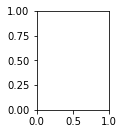

In [45]:
plt.subplot(2,4,3)  #2: two dimensions

C:\Users\Admin\New_anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


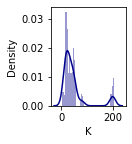

In [46]:
plt.subplot(2,4,3)
sns.distplot(data['K'],color='darkblue')
plt.subplots_adjust(left=0.1)


C:\Users\Admin\New_anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\New_anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\New_anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

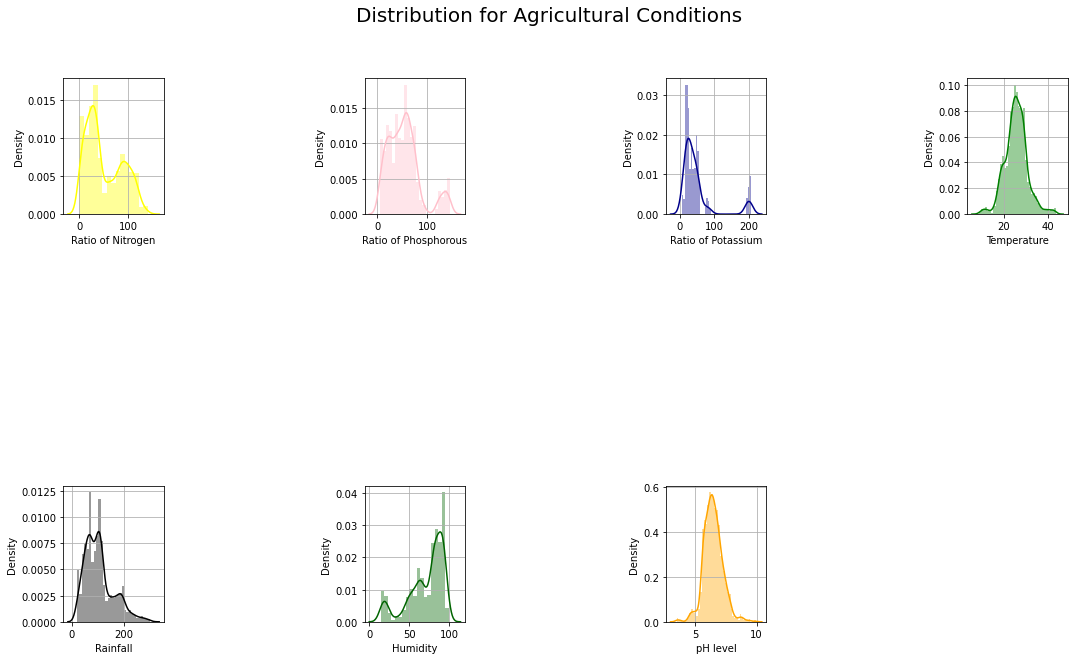

In [47]:
plt.figure(figsize=(18,10))

plt.subplot(2,4,1)
sns.distplot(data['N'],color='yellow')
plt.subplots_adjust(hspace=2,wspace=2)
plt.xlabel("Ratio of Nitrogen",fontsize=10)
plt.grid()


plt.subplot(2,4,2)
sns.distplot(data['P'],color='pink')
plt.subplots_adjust(hspace=2,wspace=2)
plt.xlabel("Ratio of Phosphorous", fontsize=10)
plt.grid()


plt.subplot(2,4,3)
sns.distplot(data['K'],color='darkblue',)
plt.subplots_adjust(hspace=2,wspace=2)
plt.xlabel("Ratio of Potassium", fontsize=10)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='green')
plt.xlabel("Temperature", fontsize=10)
plt.grid()


plt.subplot(2,4,5)
sns.distplot(data['rainfall'],color='black')
plt.subplots_adjust(hspace=100,wspace=2)
plt.xlabel("Rainfall", fontsize=10)
plt.grid()


plt.subplot(2,4,6)
sns.distplot(data['humidity'],color='darkgreen')
plt.xlabel("Humidity", fontsize=10)
plt.grid()


plt.subplot(2,4,7)
sns.distplot(data['ph'],color='orange')
plt.subplots_adjust(hspace=2,wspace=2)
plt.xlabel("pH level", fontsize=10)
plt.grid()


plt.suptitle("Distribution for Agricultural Conditions", fontsize=20)
plt.show()

In [48]:
#Lets find out some interseting facts.
print('Some Interesting Patterns')
print("--------------------------------------------------------")
print("Crops which requires very High Ratio of Nitrogen content in soil:",data[data['N']> 120]['label'].unique())
print("\nCrops which requires very High Ratio of Phosphorous content in soil:",data[data['P']> 100]['label'].unique())
print("\nCrops which requires very High Ratio of Potassium content in soil:",data[data['K']> 200]['label'].unique())
print("\nCrops which requires very High Rainfall :",data[data['rainfall']> 200]['label'].unique())
print("\nCrops which requires very Low Rainfall :",data[data['rainfall']< 200]['label'].unique())
print("\nCrops which requires very Low Temperature:",data[data['temperature']> 10]['label'].unique())
print("\nCrops which requires very High Temperature:",data[data['temperature']> 40]['label'].unique())
print("\nCrops which requires very Low Humidity:",data[data['humidity']< 20]['label'].unique())
print("\nCrops which requires very Low pH:",data[data['ph']< 4]['label'].unique())
print("\nCrops which requires very High pH :",data[data['ph']> 9]['label'].unique())


Some Interesting Patterns
--------------------------------------------------------
Crops which requires very High Ratio of Nitrogen content in soil: ['cotton']

Crops which requires very High Ratio of Phosphorous content in soil: ['grapes' 'apple']

Crops which requires very High Ratio of Potassium content in soil: ['grapes' 'apple']

Crops which requires very High Rainfall : ['rice' 'papaya' 'coconut']

Crops which requires very Low Rainfall : ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Crops which requires very Low Temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Crops which requires very High Temperature: ['grap

In [49]:
#Lets understand which crops can only be grown in Summer Season,Winter Season and Rainy Season.

print("Summer Crops:")
print(data[(data['temperature']>30)& (data['humidity']> 50)]['label'].unique())
print("------------------------------------------------------------------------")
print("Winter Crops:")
print(data[(data['temperature']<20)& (data['humidity']> 30)]['label'].unique())
print("------------------------------------------------------------------------")
print("Rainy Crops:")
print(data[(data['temperature']>20)& (data['humidity']> 30)]['label'].unique())
print("------------------------------------------------------------------------")

Summer Crops:
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------
Winter Crops:
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------
Rainy Crops:
['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon' 'apple'
 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
------------------------------------------------------------------------


In [50]:
#NOW FROM HERE ONWARDS...WE WILL LIST OUT THOSE KIND OF CROPS WHICH NEED SAME/SIMILAR KIND OF CONDITIONS TO GROW.
#FOR DOING SO WE WILL USE THE CONCEPT OF CLUSTERING ANALYSIS.

In [51]:
#WHAT IS CLUSTERING ANALYSIS:
#• Cluster: a collection of data objects
#    – Similar to one another within the same cluster
#    – Dissimilar to the objects in other clusters
#• Cluster analysis
#     – Grouping a set of data objects into clusters
#• Clustering is unsupervised classification: no predefined classes 

In [52]:
#for clustering we gonna use k-mean clustering algorithm.
#first import KMeans from sklearn library.

In [53]:
from sklearn.cluster import KMeans

#removing the labels column # because this is unsupervised .
x=data.drop(['label'],axis=1)

#Now our data is ready for clustering analysis.


#selecting all the values of the data
x=x.values


#checking the shape
print(x.shape)

(2200, 7)


In [54]:
#Now using this clustering KMeans algorithm we gonna train your data.....But before that we should have the knowledage of 
#that what is the number of cluster formation should takes place.....ie. total number of clusters ?

In [55]:
#SO , FOR FINDING THE NUMBER OF CLUSTERS , WE GONNA USE A METHOD CALLED ELBOW METHOD.

In [56]:
#FIND ELBOWS : BENDS IN THE CHART...

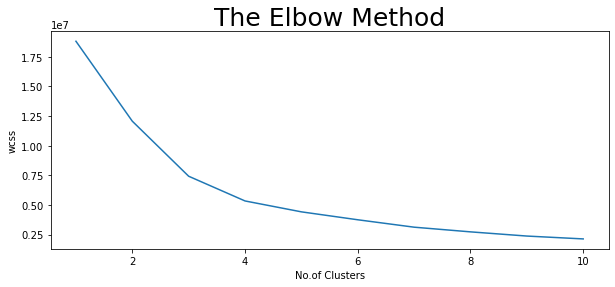

In [57]:
#Lets determine the optimum number of clusters within the dataset.


plt.rcParams['figure.figsize']=(10,4)

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter =300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Lets plot the results
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method",fontsize=25)
plt.xlabel("No.of Clusters")
plt.ylabel("wcss")
plt.show()

In [58]:
# we can see that we get two elbows here....one is at 3 and other is at 4....so which one to choose? so answer is the last of 
# that is choose 4....means we gonna have total no of clusters is 4...4 IS CALLED OPTIMAL CLUSTERS.

In [59]:
#NOW WE ARE AT THE STATE TO APPLY K MEANS CLUSTERING ON OUT DATA.....

In [60]:
#1. DEFINE K MEAN CLUSTER FIRST ON THE DATA .
#2. THEN TRAIN THIS DATASET ON THIS ALGORITHM.
#3. AFTER THE TRAINING...STORE THE TRAINED DATA INTO VARIABLE CALLED y_means...and we are all done...

In [61]:
#Lets implement the K Means algorithm to perform clustering analysis.

km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)



#Lets find out the results    
a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})


#Lets check the clusters of each crops.

print("Lets check the results after applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:",z[z['cluster']==0]['label'].unique())
print("----------------------------------------------------------------------------")
print("Crops in Second Cluster:",z[z['cluster']==1]['label'].unique())
print("----------------------------------------------------------------------------")
print("Crops in Third Cluster:",z[z['cluster']==2]['label'].unique())
print("----------------------------------------------------------------------------")
print("Crops in Forth Cluster:",z[z['cluster']==3]['label'].unique())
print("----------------------------------------------------------------------------")


Lets check the results after applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
----------------------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
----------------------------------------------------------------------------


In [62]:
#FROM THESE ABOVE RESULTS...IT WILL MORE EASIER FOR FARMERS TO ADOPT MORDERN FARMING,THEIR PRODUCTIVITY AND PROFIT WILL 
#ABSOLUTELY INC.

In [63]:
#NOW WE GONNA BUILD A PREDICTIVE MODEL,WHICH GONNA PRESENT MOST SUITABLE CROPS FOR EACH SPECIFIC CONDITION.
#1.STEP IS TO TRAIN THE DATASET USING MACHINE LEARNING MODEL.

In [64]:
#PREDICTIVE MODELING:
#         ------PREDICTIVE MODELING IS A PART OF ARTIFICAL INTELLIGENCE.
#         ------USING OUR DATASET IN ANY PREDICTIVE MODEL,WE GONNA BUILD A MODEL,AND AS MODEL IS TRAINED, THEN WE GONNA USE THAT
# MODEL FOR UNSEEN DATA PREDICTION.

In [65]:
#FOR CHECKING WHETHER THE MODEL, IS GIVING IS THE RIGHT PREDICITION OR NOT.....FOR THAT WE HAVE DIFF TYPE OF EVALUATION MATRIX...
#EVALUATION MATRIX GONNA GIVE US ACCURACY SCORE...WHICH INDICATES...WHEATHER OUR MODEL IS CORRECT OR NOT.

In [66]:
#CREATING MACHINE LEARNING PREDICITVE MODEL...
#AND FOR CREATING THIS MODEL...WE GONNA USE LOGISTIC REGRESSION ALGORITHM...
#LOGISTIC REG: IT IS A PROBABLILISTIC MODEL,PERFORMS AWESOME IN CASE OF MULTIPLE CLASS....

In [67]:
#FIRST OF ALL WE HAVE TO REMOVE THE 'LABEL' COLUMN FROM OUR DATASET SO, THAT OUR MODEL CANNOT CHEAT ANYHOW/OR GONNA  BIAS.

In [68]:
#Lets split the dataset for predicitve modeling..

y=data['label']
x=data.drop(['label'],axis=1)

print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (2200, 7)
shape of y (2200,)


In [69]:
#now split the dataset into trainig set and testing set.


In [70]:
#Lets create Training and Testing sets for Variation of Results.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("The shape of x train: ",x_train.shape)
print("The shape of x test: ",x_test.shape)
print("The shape of y train: ",y_train.shape)
print("The shape of y test: ",y_test.shape)

The shape of x train:  (1760, 7)
The shape of x test:  (440, 7)
The shape of y train:  (1760,)
The shape of y test:  (440,)


In [71]:
#now import the model : logistic regression from linear_model from lib sklearn.

In [72]:
#Lets create a Predictive Model.

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Admin\New_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
#model=LogisticRegression()
#model.fit(x_train,y_train)
# from above, now our model is trained now...

In [74]:
#now check whether model is accurate or not...by predicting the values over testing set.

In [75]:
#y_pred=model.predict(x_test) from this...we know the value of predicted values of x.. x_test is store stored into y_pred.
# so to check the accuracy we just have to compare the value of y_pred with y_test.....for that we gonna use classification
#report..we have to import it from sklearn library.

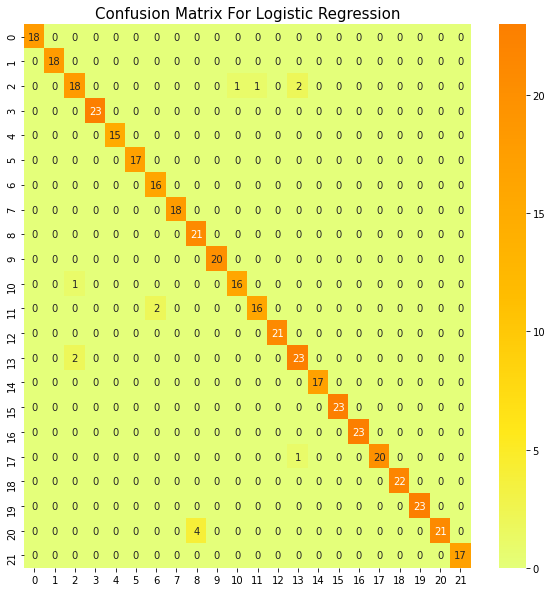

In [76]:
#Lets evaluate the Model Performance.
from sklearn.metrics import confusion_matrix

#lets print the confusion matrix first.
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap="Wistia")
plt.title("Confusion Matrix For Logistic Regression",fontsize=15)
plt.show()

In [79]:
#Lets print the Classification report also
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)



# if the value of recall and precision is high this implies that our model is best trained and our model is very accurate.

#In information retrieval, a perfect precision score of 1.0 means that every result retrieved by search was relevant.
#whereas, a perfect recall score of 1.0 means that all relevant documents were retrived by the search.

#f1 score gives the harmonic mean of precision and recall...is a measure of model's accuracy on a dataset.
#support: support is the number of actual occurrances of the class in the specified dataset.

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [80]:
#to check whether it is working correct or not...we gonna have an input from exisiting data...and cross check it...
#like we gonna give soil and weather condition for rice in the model...without telling  the model about the crop name..
#just we gonna input the conditons of soil and climate....and we gonna check wheather it will return "RICE"  as its answer or not.

In [82]:
#Lets check the head of the dataset .
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
# now from here ..scrape some data and use it as input for our model to cross check the name of the crop

# PREDICTION

In [89]:
prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The suggested crop for given climatic condition is:" , prediction)

The suggested crop for given climatic condition is: ['rice']
